In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os,sys,inspect,pickle,json,time,datetime,re; root = os.path.dirname(os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe()))))
import random as rn
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline
root

TARGET = 'activity'
DATA_DIR = 'activity-atactic'
INPUT_FOLDER = 'v09_one_month'#'v02_add55x5x3roll' # 'v01_original_clean'##'v00_original'
EXTRA_DATA1 = 'v00_original\\activity_test_timestamps.csv'

# load
train_data = pickle.load(open(os.path.join(root,'input',DATA_DIR,INPUT_FOLDER,'train.pkl'),"rb"))
test_data  = pickle.load(open(os.path.join(root,'input',DATA_DIR,INPUT_FOLDER,'test.pkl'),"rb"))
extra_data1 = pd.read_csv(os.path.join(root,'input',DATA_DIR,EXTRA_DATA1), index_col="date", parse_dates=["date"])
print('train_data',train_data.shape, 'test_data',test_data.shape, 'extra_data1',extra_data1.shape)#, 'atactic_test_target',atactic_test_target.shape,time.time()-tic,'sec')
ac_tags = pd.read_csv('activity_tags.csv',delimiter=';')
def feat_desc(fname): desc = ac_tags[ac_tags.feature==fname][['description','units']].values[0]; return desc[0] + ', ' + desc[1]
print(train_data.index[0], train_data.index[-1])
feat_desc('f23')


train_data (42495, 56) test_data (85891, 110) extra_data1 (85891, 0)
2018-04-01 00:01:00 2018-05-01 00:01:00


'Расход ТЭА к R2, л/c'

month


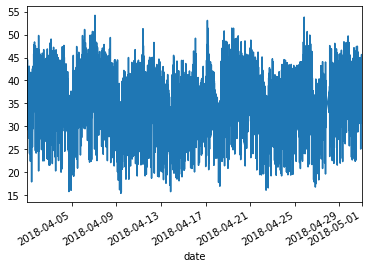

In [2]:
print('month')
train_data['activity'].plot()

day


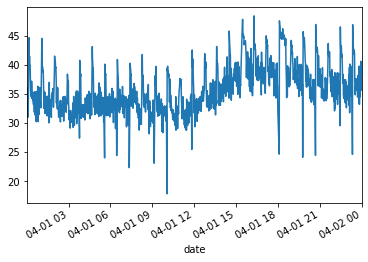

In [3]:
print('day')
train_data['activity']["2018-04-01 00:01:00":"2018-04-02 00:01:00"].plot()


6h cycle


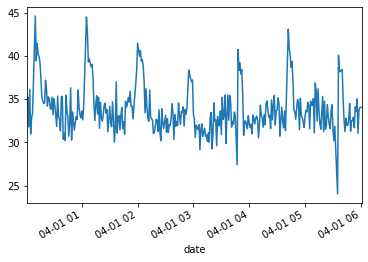

In [4]:
print('6h cycle')
train_data['activity']["2018-04-01 00:01:00":"2018-04-01 06:01:00"].plot()


55min


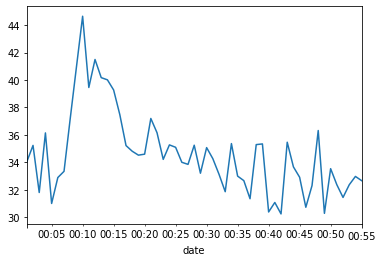

In [5]:
print('55min')
train_data['activity']["2018-04-01 00:01:00":"2018-04-01 00:55:00"].plot()


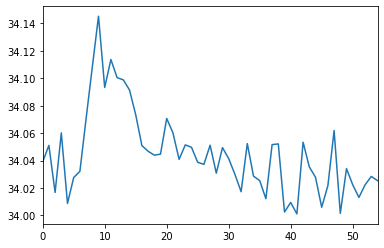

In [17]:
def exponentially_weighted_averages(df_col, B=0.99): # B = 0.1 -> like Y_pred = Y; B = 0.5 -> average values; B = 0.9 -> like straight line  
    Y = df_col.values.reshape(1,len(df_col))
    L = Y.shape[1]
    y_pred_prev = Y[0,0]
    Y_pred = np.zeros((1,L))
    for i in range(L): Y_pred[0,i] = B*y_pred_prev + (1-B)*Y[0,i]
    return pd.Series(Y_pred.reshape(-1))
exponentially_weighted_averages(train_data['activity']["2018-04-01 00:01:00":"2018-04-01 00:55:00"]).plot()


Text(0, 0.5, 'Price (USD)')

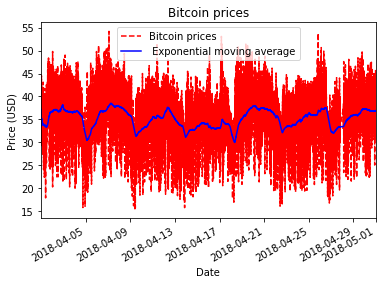

In [21]:
train_data['activity'].plot(style = 'r--', label = 'Bitcoin prices')
train_data['activity'].ewm(span = 1360).mean().plot(style = 'b', label = ' Exponential moving average')

plt.legend()
plt.title("Bitcoin prices")
plt.xlabel('Date')
plt.ylabel('Price (USD)')

In [6]:
# for i in range(0,1):#(2,12):
#     m1 = '04' #str(i).zfill(2)#'08'
#     #m1 = str(i).zfill(2)#'08'
#     m2 = str(int(m1)+1).zfill(2)
#     start = "2018-"+m1+"-01 00:01:00"
#     stop = "2018-"+m2+"-01 00:01:00"
#     train_data['activity'][start:stop].plot() # ['f3','f4','f5','f22'] 12 and 19 feb - monday
